# Duplicate Question Pairs | Quora Question Pairs | NLP Projects

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('questions.csv')

In [3]:
df.shape

(404351, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.sample(4)

,id,qid1,qid2,question1,question2,is_duplicate
195869,195869,386598,386599,What is the tastiest food you have eaten?,What is the best food you have eaten?,1
86300,86300,171387,171388,Do you feel like the Salt of the Earth metapho...,Where can I get data for Indian insurance recr...,0
274230,274230,539250,539251,Is there any ORM framwork like Hibernate for a...,Is there a better ORM than Hibernate for Sprin...,0
112170,112170,222405,222406,What are the similarities between Narendra Mod...,Is Donald Trump equivalent to Narendra Modi of...,1


In [7]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
df.duplicated().sum()

0

0    255045
1    149306
Name: is_duplicate, dtype: int64
0    63.07515
1    36.92485
Name: is_duplicate, dtype: float64


<AxesSubplot:>

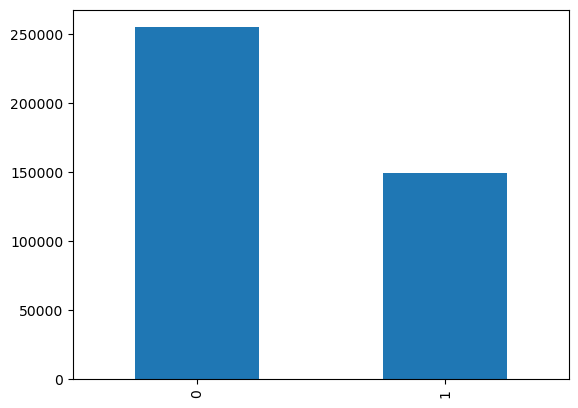

In [11]:
# distribution of duplicate or non duplicate questions

print(df['is_duplicate'].value_counts())

print(df['is_duplicate'].value_counts()/df['is_duplicate'].count()*100)

df['is_duplicate'].value_counts().plot(kind='bar')


In [14]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("Number of unique questions " , np.unique(qid).shape[0])
x= qid.value_counts()>1
print('Number of questions getting repeated ',x[x].shape[0] )

Number of unique questions  789801
Number of questions getting repeated  13698


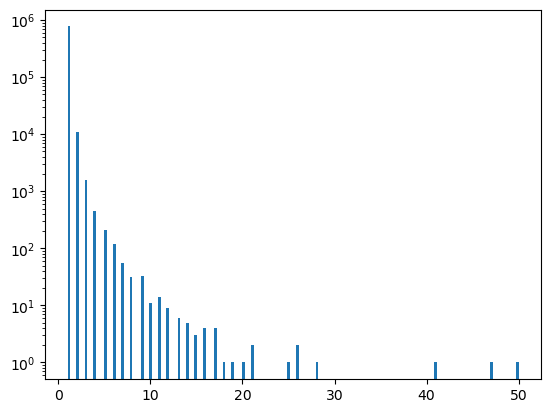

In [15]:

# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [23]:
new_df = df.sample(30000)

In [24]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [25]:
ques_df = new_df[['question1' , 'question2']]
ques_df.head()

,question1,question2
23007,What are race relations in South Africa like i...,What kind of people dislikes kind and generous...
113543,What happened to your school bully?,What can happen if you simply tease a student ...
310899,What are the key responsibilities of the CEO i...,What should a concept stage start-up CEO focus...
66286,What's the best way to get really good at bask...,How do I get good in basketball?
229366,How do I make money in Youtube with a video?,How can you make money with a YouTube channel?


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
questions = list(ques_df['question1']) + list(ques_df['question2'])


cv = CountVectorizer(max_features=2000)

q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [28]:
temp_df1 = pd.DataFrame(q1_arr , index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr , index = ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2] , axis= 1)

In [39]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [35]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,is_duplicate
23007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
310899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)


0.74

In [41]:

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7215